In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [8]:
#データ読み込み
train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")
gender_submission = pd.read_csv("../dataset/gender_submission.csv")

#特徴量エンジニアリング
#train
t_train = train["Survived"]
train["FamilySize"] = train["SibSp"] + train["Parch"] 
x_train = train[["Pclass","Sex","Age","FamilySize","Fare","Embarked"]]
x_train["Sex"].replace(["male","female"],[0,1],inplace=True)
# Embarkedをonehot変換
Embarked = pd.get_dummies(x_train["Embarked"])
Embarked.replace([False,True],[0,1],inplace=True)
x_train = x_train.drop(columns=['Embarked'])
x_train = pd.concat([x_train,Embarked],axis = 1)
x_train.fillna(x_train.mean(), inplace=True)
#正規化
x_train = (x_train - x_train.mean()) / x_train.std()
x_train
#test
test["FamilySize"] = test["SibSp"] + test["Parch"] 
x_test = test[["Pclass","Sex","Age","FamilySize","Fare","Embarked"]]
x_test["Sex"].replace(["male","female"],[0,1],inplace=True)
# Embarkedをonehot変換
Embarked = pd.get_dummies(x_test["Embarked"])
Embarked.replace([False,True],[0,1],inplace=True)
x_test = x_test.drop(columns=['Embarked'])
x_test = pd.concat([x_test,Embarked],axis = 1)
x_test.fillna(x_test.mean(), inplace=True)
#正規化
x_test = (x_test - x_test.mean()) / x_test.std()
x_test

C:\Users\logihaal\AppData\Local\Temp\ipykernel_11076\2187756855.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train["Sex"].replace(["male","female"],[0,1],inplace=True)
C:\Users\logihaal\AppData\Local\Temp\ipykernel_11076\2187756855.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_tra

,Pclass,Sex,Age,FamilySize,Fare,C,Q,S
0,0.872436,-0.755024,0.334592,-0.552780,-0.497811,-0.567462,2.840354,-1.349059
1,0.872436,1.321292,1.323944,0.105516,-0.512660,-0.567462,-0.351227,0.739484
2,-0.315441,-0.755024,2.511166,-0.552780,-0.464532,-0.567462,2.840354,-1.349059
3,0.872436,-0.755024,-0.259019,-0.552780,-0.482888,-0.567462,-0.351227,0.739484
4,0.872436,1.321292,-0.654760,0.763813,-0.417971,-0.567462,-0.351227,0.739484
...,...,...,...,...,...,...,...,...
413,0.872436,-0.755024,0.000000,-0.552780,-0.493856,-0.567462,-0.351227,0.739484
414,-1.503319,1.321292,0.690758,-0.552780,1.312180,1.758018,-0.351227,-1.349059
415,0.872436,-0.755024,0.651184,-0.552780,-0.508183,-0.567462,-0.351227,0.739484
416,0.872436,-0.755024,0.000000,-0.552780,-0.493856,-0.567462,-0.351227,0.739484


In [13]:
ab_clf = AdaBoostClassifier(
    n_estimators=100, #モデルの数
    learning_rate=1.0, #重みの更新具合
    random_state=117117,
)
ab_clf.fit(x_train, t_train)

t_pred = ab_clf.predict(x_train)
ab_clf_score = roc_auc_score(t_train, t_pred)

ab_clf_score


C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8251126450004793

In [16]:
scores = []
learning_rate_list = np.linspace(0.01, 1, 100)
for lr in learning_rate_list:
    ab_clf_i = AdaBoostClassifier(
        n_estimators=10,
        learning_rate=lr,
        random_state=117117,
    )
    ab_clf_i.fit(x_train, t_train)

    y_pred = ab_clf_i.predict(x_train)
    scores.append(roc_auc_score(t_train, y_pred))


C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circ

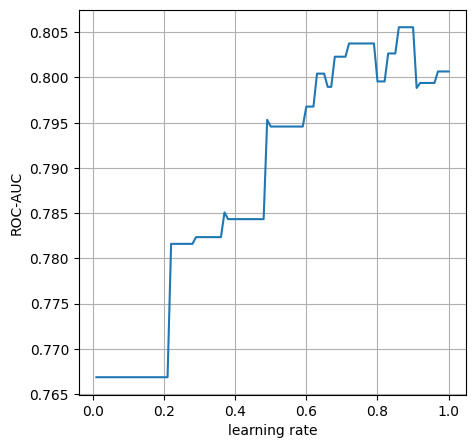

In [17]:
plt.figure(figsize=(5, 5))
plt.plot(learning_rate_list, scores)
plt.xlabel("learning rate")
plt.ylabel("ROC-AUC")
plt.grid()
plt.show()


In [19]:
scores = []
n_estimators_list = [int(ne) for ne in np.linspace(5, 70, 40)]
for n_estimators in n_estimators_list:
    ab_clf_i = AdaBoostClassifier(
        n_estimators=int(n_estimators),
        learning_rate=0.6,
        random_state=117117,
    )
    ab_clf_i.fit(x_train, t_train)

    y_pred = ab_clf_i.predict(x_train)
    scores.append(roc_auc_score(t_train, y_pred))


C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circ

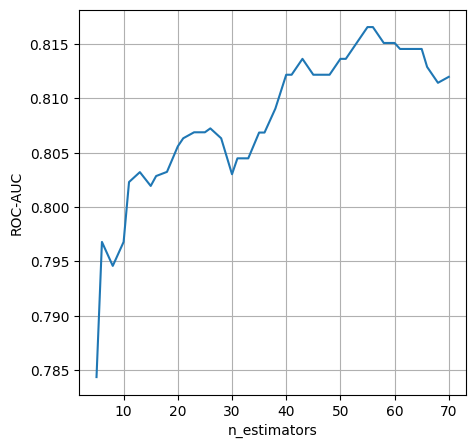

In [20]:
plt.figure(figsize=(5, 5))
plt.plot(n_estimators_list, scores)
plt.xlabel("n_estimators")
plt.ylabel("ROC-AUC")
plt.grid()
plt.show()

In [26]:
ab_clf = AdaBoostClassifier(
    n_estimators=55, #モデルの数
    learning_rate=0.88, #重みの更新具合
    random_state=117117,
    estimator=DecisionTreeClassifier(max_depth=10),
)
ab_clf.fit(x_train, t_train)

t_pred = ab_clf.predict(x_train)
ab_clf_score = roc_auc_score(t_train, t_pred)

ab_clf_score


C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9799156360847474

In [24]:
scores = []
base_estimator_list = [
    DecisionTreeClassifier(max_depth=md) for md in [2, 3, 4, 5, 6, 7, 8, 9, 10]
]
for base_estimator in base_estimator_list:
    ab_clf_i = AdaBoostClassifier(
        n_estimators=10,
        learning_rate=0.5,
        random_state=117117,
        estimator=base_estimator,
    )
    ab_clf_i.fit(x_train, t_train)

    y_pred = ab_clf_i.predict(x_train)
    scores.append(roc_auc_score(t_train, y_pred))


C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circ

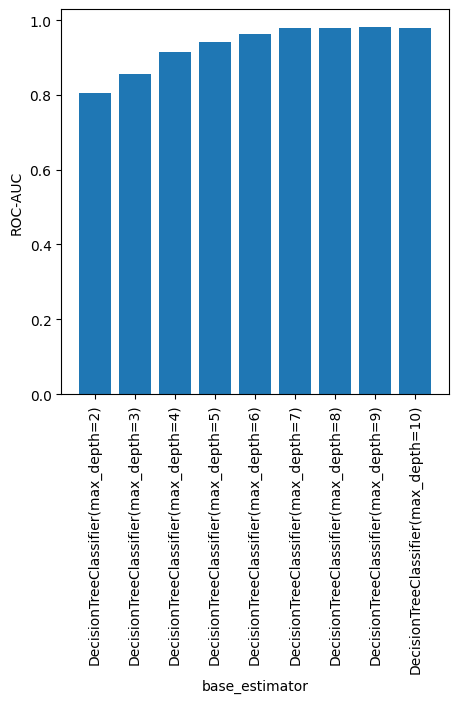

In [25]:
plt.figure(figsize=(5, 5))
plt_index = [i for i in range(len(base_estimator_list))]
plt.bar(plt_index, scores)
plt.xticks(plt_index, [str(bm) for bm in base_estimator_list], rotation=90)
plt.xlabel("base_estimator")
plt.ylabel("ROC-AUC")
plt.show()

In [28]:
ab_clf = AdaBoostClassifier(
    n_estimators=55, #モデルの数
    learning_rate=0.88, #重みの更新具合
    random_state=117117,
    estimator=DecisionTreeClassifier(max_depth=10),
)
ab_clf.fit(x_train, t_train)

t_test = ab_clf.predict(x_test)

C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [30]:
x_test["Survived"] = t_test
t_output = x_test["Survived"]
t_output.index = t_output.index + 892
t_output.index.rename('PassengerId', inplace=True)
# DataFrameをCSVに出力
t_output.to_csv("output_Adaboost.csv")